In [1]:
import ee
import geemap
import os
import ipywidgets as widgets

In [2]:
# geemap.update_package()

In [3]:
Map = geemap.Map(center=[43.2567,76.9286], zoom=4)
Map

Map(center=[43.2567, 76.9286], controls=(WidgetControl(options=['position'], widget=HBox(children=(ToggleButto…

In [4]:
#dataset_sio = ee.ImageCollection('MODIS/006/MOD10A1') \
                  #.filter(ee.Filter.date('2021-01-01', '2021-04-01'))
#Map.addLayer(dataset_sio)/

In [5]:
# js_snippet = """
# var dataset = ee.ImageCollection('LANDSAT/LC08/C01/T1_8DAY_NDSI')
#                   .filterDate('2017-01-01', '2017-12-31');
# var colorized = dataset.select('NDSI');
# var colorizedVis = {
#   palette: ['000088', '0000FF', '8888FF', 'FFFFFF'],
# };
# Map.setCenter(6.746, 46.529, 6);
# Map.addLayer(colorized, colorizedVis, 'LANDSAT8(NDSI)');
# """

In [6]:
# geemap.js_snippet_to_py(js_snippet, add_new_cell=True, import_ee=True, import_geemap=True, show_map=True)

In [7]:
dataset2 = ee.ImageCollection('LANDSAT/LC08/C01/T1_8DAY_NDSI') \
                  .filterDate('2020-08-10', '2020-08-20')
colorized = dataset2.select('NDSI')
colorizedVis = {
  'palette': ['000088', '0000FF', '8888FF', 'FFFFFF'],
}
Map.addLayer(colorized, colorizedVis, 'LANDSAT8(NDSI)')

In [8]:
dataset = ee.ImageCollection('MODIS/006/MOD10A1') \
                  .filter(ee.Filter.date('2021-05-21', '2021-05-22'))
snowCover = dataset.select('NDSI_Snow_Cover')
snowCoverVis = {
  'min': 0.0,
  'max': 100.0,
  'palette': ['black', '0dffff', '0524ff', 'ffffff'],
}
Map.addLayer(snowCover, snowCoverVis, 'Snow Cover')

In [9]:
dataset = ee.ImageCollection('MODIS/006/MOD10A1') \
                  .filter(ee.Filter.date('2021-05-21', '2021-05-22'))
snowAlbedo = dataset.select('Snow_Albedo_Daily_Tile')
snowAlbedoVis = {
  'min': 0.0,
  'max': 100.0,
  'palette': ['black', '0dffff', '0524ff', 'ffffff'],
}
Map.addLayer(snowAlbedo, snowAlbedoVis, 'Snow Albedo Daily')

In [10]:
dataset1 = ee.ImageCollection("ECMWF/ERA5_LAND/HOURLY") \
                .filter(ee.Filter.date('2021-02-24', '2021-02-25'))
visualization = {
  'bands': ['temperature_2m'],
  'min': 250.0,
  'max': 320.0,
  'palette': [
    "#000080","#0000D9","#4000FF","#8000FF","#0080FF","#00FFFF",
    "#00FF80","#80FF00","#DAFF00","#FFFF00","#FFF500","#FFDA00",
    "#FFB000","#FFA400","#FF4F00","#FF2500","#FF0A00","#FF00FF",
  ]
}
Map.addLayer(dataset1, visualization, "Air temperature [K] at 2m height")

In [11]:
#dataset_fsz = ee.FeatureCollection('users/doni/kz')
#Map.addLayer(dataset_fsz, {'color': 'ffd500ff', 'width': 3, 'lineType': 'solid', 'fillColor': 'ffffff00'}, "kz")

In [12]:
dataset_xbh = ee.FeatureCollection('users/doni/glims_polygons')
Map.addLayer(dataset_xbh, {'color': 'ff0073ff', 'width': 2, 'lineType': 'solid', 'fillColor': '00000000'}, "glims_polygons")

In [13]:
#import pandas as pd
#import matplotlib.pyplot as plt
#import numpy as np
#import seaborn as sns
#fog=pd.read_csv('FoG(1).csv')
#fog

,PU,NAME,WGMS_ID,LATITUDE,LONGITUDE,GEOREG1,GEOREG2,SURVEY_YEAR,REFERENCE_YEAR,WINTER_BALANCE,SUMMER_BALANCE,ANNUAL_BALANCE,ELA,AAR
0,KZ,TS.TUYUKSUYSKIY,817,43.05,77.08,"Asia, Central","Tien Shan, West",1957,1956,NaN,NaN,-150,3760,48.0
1,KZ,TS.TUYUKSUYSKIY,817,43.05,77.08,"Asia, Central","Tien Shan, West",1958,1957,NaN,NaN,330,3670,67.0
2,KZ,TS.TUYUKSUYSKIY,817,43.05,77.08,"Asia, Central","Tien Shan, West",1959,1958,NaN,NaN,-420,3800,37.0
3,KZ,TS.TUYUKSUYSKIY,817,43.05,77.08,"Asia, Central","Tien Shan, West",1960,1959,NaN,NaN,-100,3740,54.0
4,KZ,TS.TUYUKSUYSKIY,817,43.05,77.08,"Asia, Central","Tien Shan, West",1961,1960,NaN,NaN,-560,3820,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,KZ,TS.TUYUKSUYSKIY,817,43.05,77.08,"Asia, Central","Tien Shan, West",2015,2014,654.0,-1407.0,-756,3900,31.0
59,KZ,TS.TUYUKSUYSKIY,817,43.05,77.08,"Asia, Central","Tien Shan, West",2016,2015,1024.0,-460.0,561,3730,48.0
60,KZ,TS.TUYUKSUYSKIY,817,43.05,77.08,"Asia, Central","Tien Shan, West",2017,2016,699.0,-1806.0,-1113,3950,26.0
61,KZ,TS.TUYUKSUYSKIY,817,43.05,77.08,"Asia, Central","Tien Shan, West",2018,2017,558.0,-632.0,-75,3780,51.0


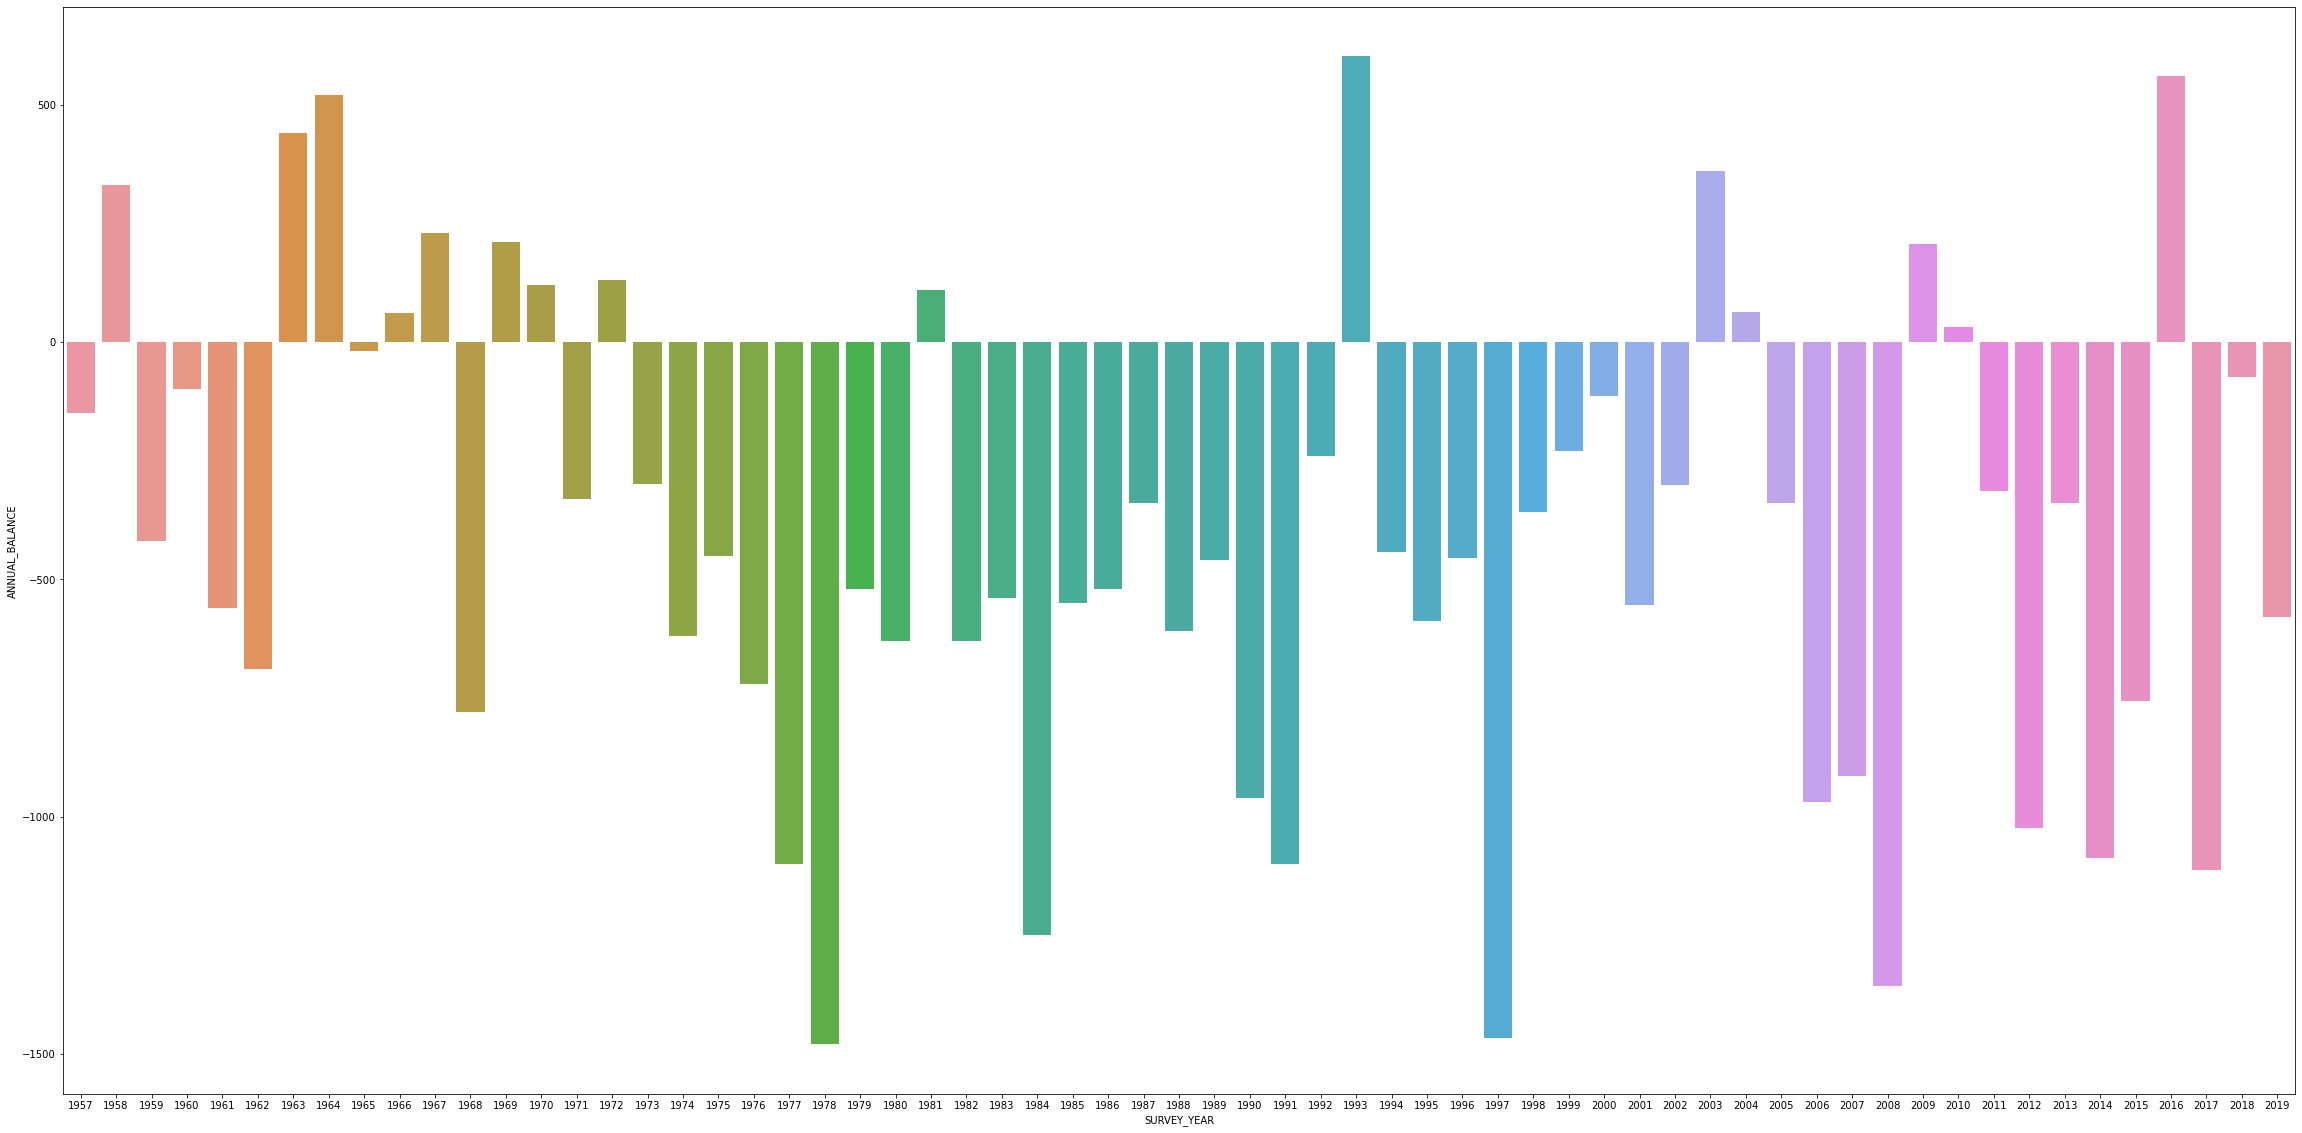

In [14]:
#plt.figure(figsize=[40,20])
#sns.barplot(x="SURVEY_YEAR", y="ANNUAL_BALANCE",data=fog)

In [15]:
# dataset_ty = ee.FeatureCollection('users/doni/Tuyuksuyskiy')
# Map.addLayer(dataset_ty, {'color': 'ff0073ff', 'width': 2, 'lineType': 'solid', 'fillColor': '00000000'}, "Tuyuksuyskiy")

In [16]:
# style = {'description_width': 'initial'}
# title = widgets.Text(
#     description='Title:',
#     value='Landsat Timelapse',
#     width=200,
#     style=style
# )

# bands = widgets.Dropdown(
#     description='Select RGB Combo:',
#     options=['Red/Green/Blue', 'NIR/Red/Green',  'SWIR2/SWIR1/NIR', 'NIR/SWIR1/Red','SWIR2/NIR/Red', 
#              'SWIR2/SWIR1/Red', 'SWIR1/NIR/Blue', 'NIR/SWIR1/Blue', 'SWIR2/NIR/Green', 'SWIR1/NIR/Red'],
#     value='NIR/Red/Green',
#     style=style
# )

# hbox1 = widgets.HBox([title, bands])
# hbox1

In [17]:
# speed = widgets.IntSlider(
#     description='  Frames per second:',
#     tooltip='Frames per second:',
#     value=10,
#     min=1, 
#     max = 30,
#     style=style
# )

# cloud = widgets.Checkbox(
#     value=True,
#     description='Apply fmask (remove clouds, shadows, snow)',
#     style=style
# )

# hbox2 = widgets.HBox([speed, cloud])
# hbox2

In [18]:
# start_year = widgets.IntSlider(description='Start Year:', value=1984, min=1984, max=2021, style=style)
# end_year = widgets.IntSlider(description='End Year:', value=2020, min=1984, max=2021, style=style)
# start_month = widgets.IntSlider(description='Start Month:', value=5, min=1, max=12, style=style)
# end_month = widgets.IntSlider(description='End Month:', value=10, min=1, max=12, style=style)
# hbox3 = widgets.HBox([start_year, end_year, start_month, end_month])
# hbox3

In [19]:
# font_size = widgets.IntSlider(description='Font size:', value=30, min=10, max=50, style=style)

# font_color = widgets.ColorPicker(
#     concise=False,
#     description='Font color:',
#     value='white',
#     style=style
# )

# progress_bar_color = widgets.ColorPicker(
#     concise=False,
#     description='Progress bar color:',
#     value='blue',
#     style=style
# )

# hbox4 = widgets.HBox([font_size, font_color, progress_bar_color])
# hbox4

In [20]:
# # Normalized Satellite Indices: https://www.usna.edu/Users/oceano/pguth/md_help/html/norm_sat.htm

# nd_options = ['Vegetation Index (NDVI)', 
#               'Water Index (NDWI)',
#               'Modified Water Index (MNDWI)',
#               'Snow Index (NDSI)',
#               'Soil Index (NDSI)',
#               'Burn Ratio (NBR)',
#               'Customized']
# nd_indices = widgets.Dropdown(options=nd_options, value=None, description='Normalized Difference Index:', style=style)

# first_band = widgets.Dropdown(
#     description='1st band:',
#     options=['Blue', 'Green','Red','NIR', 'SWIR1', 'SWIR2'],
#     value=None,
#     style=style
# )

# second_band = widgets.Dropdown(
#     description='2nd band:',
#     options=['Blue', 'Green','Red','NIR', 'SWIR1', 'SWIR2'],
#     value=None,
#     style=style
# )

# nd_threshold = widgets.FloatSlider(
#     value=0,
#     min=-1,
#     max=1,
#     step=0.01,
#     description='Threshold:',
#     orientation='horizontal',
# )

# nd_color = widgets.ColorPicker(
#     concise=False,
#     description='Color:',
#     value='blue',
#     style=style
# )

# def nd_index_change(change):
#     if nd_indices.value == 'Vegetation Index (NDVI)':
#         first_band.value = 'NIR'
#         second_band.value = 'Red'
#     elif nd_indices.value == 'Water Index (NDWI)':
#         first_band.value = 'NIR'
#         second_band.value = 'SWIR1'   
#     elif nd_indices.value == 'Modified Water Index (MNDWI)':
#         first_band.value = 'Green'
#         second_band.value = 'SWIR1'   
#     elif nd_indices.value == 'Snow Index (NDSI)':
#         first_band.value = 'Green'
#         second_band.value = 'SWIR1'
#     elif nd_indices.value == 'Soil Index (NDSI)':
#         first_band.value = 'SWIR1'
#         second_band.value = 'NIR'        
#     elif nd_indices.value == 'Burn Ratio (NBR)':
#         first_band.value = 'NIR'
#         second_band.value = 'SWIR2'
#     elif nd_indices.value == 'Customized':
#         first_band.value = None
#         second_band.value = None
        
# nd_indices.observe(nd_index_change, names='value')

# hbox5 = widgets.HBox([nd_indices, first_band, second_band, nd_threshold, nd_color])
# hbox5

In [21]:
# create_gif = widgets.Button(
#     description='Create timelapse',
#     button_style='primary',
#     tooltip='Click to create timelapse',
#     style=style
# )

# download_gif = widgets.Button(
#     description='Download GIF',
#     button_style='primary',
#     tooltip='Click to download timelapse',
#     disabled=False,
#     style=style
# )

# output = widgets.Output()

# hbox5 = widgets.HBox([create_gif])
# hbox5

In [22]:
# def submit_clicked(b):
    
#     with output:
#         output.clear_output()
#         if start_year.value > end_year.value:
#             print('The end year must be great than the start year.')
#             return
#         if start_month.value > end_month.value:
#             print('The end month must be great than the start month.')
#             return        
#         if start_year.value == end_year.value:
#             add_progress_bar = False
#         else:
#             add_progress_bar = True
            
#         start_date = str(start_month.value).zfill(2) + '-01'
#         end_date = str(end_month.value).zfill(2) + '-30'
        
#         print('Computing...')
        
#         nd_bands = None    
#         if (first_band.value is not None) and (second_band.value is not None):
#             nd_bands = [first_band.value, second_band.value]

#         Map.add_landsat_ts_gif(roi=Map.user_roi, label=title.value, start_year=start_year.value, 
#                                end_year=end_year.value, start_date=start_date, end_date=end_date, 
#                                bands=bands.value.split('/'), font_color=font_color.value, 
#                                frames_per_second=speed.value, font_size=font_size.value, 
#                                add_progress_bar= add_progress_bar, progress_bar_color=progress_bar_color.value, 
#                                download=True, apply_fmask=cloud.value, nd_bands=nd_bands, 
#                                nd_threshold=nd_threshold.value, nd_palette=['black', nd_color.value]) 
            
# create_gif.on_click(submit_clicked)

In [23]:
# output

In [24]:
#dataset_wxg = ee.ImageCollection('ECMWF/ERA5_LAND/HOURLY')\
                #.filter(ee.Filter.date('2021-02-24', '2021-02-25'))
#Map.addLayer(dataset_wxg, {}, "ECMWF/ERA5_LAND/HOURLY")

In [25]:
# out_dir = os.path.join(os.path.expanduser('~'), 'Downloads')
# out_dem_stats = os.path.join(out_dir, 'FoG(1).csv')  

# if not os.path.exists(out_dir):
#     os.makedirs(out_dir)

In [26]:
# geemap.create_download_link(out_dem_stats)

In [27]:
# out_dir = os.path.join(os.path.expanduser('~'), 'Downloads')
# # out_csv = os.path.join(out_dir, 'points.csv')
# out_shp = os.path.join(out_dir, 'points.shp')

In [28]:
# Map.extract_values_to_points(out_csv)

In [29]:
# from bqplot import pyplot as plt
# from ipyleaflet import WidgetControl

In [30]:
# # Create an interactive map
# M = geemap.Map(center=[43.2567,76.9286], zoom=4, add_google_map=False)
# # Add Earth Engine data
# fc = ee.FeatureCollection('TIGER/2018/Counties')
# M.addLayer(fc, {}, 'US Counties')
# states = ee.FeatureCollection('TIGER/2018/States')
# # Map.addLayer(states, {}, 'US States')
# M

In [31]:
# # Designe interactive widgets

# style = {'description_width': 'initial'}

# output_widget = widgets.Output(layout={'border': '1px solid black'})
# output_control = WidgetControl(widget=output_widget, position='bottomright')
# M.add_control(output_control)

# admin1_widget = widgets.Text(
#     description='State:',
#     value='Tennessee',
#     width=200,
#     style=style
# )

# admin2_widget = widgets.Text(
#     description='County:',
#     value='Knox',
#     width=300,
#     style=style
# )

# aoi_widget = widgets.Checkbox(
#     value=False,
#     description='Use user-drawn AOI',
#     style=style
# )

# download_widget = widgets.Checkbox(
#     value=False,
#     description='Download chart data',
#     style=style
# )

# def aoi_change(change):
#     M.layers = M.layers[:4]   
#     M.user_roi = None
#     M.user_rois = None
#     M.draw_count = 0
#     admin1_widget.value = ''
#     admin2_widget.value = ''
#     output_widget.clear_output()
    
# aoi_widget.observe(aoi_change, names='value')

# band_combo = widgets.Dropdown(
#     description='Band combo:',
#     options=['Red/Green/Blue', 'NIR/Red/Green',  'SWIR2/SWIR1/NIR', 'NIR/SWIR1/Red','SWIR2/NIR/Red', 
#              'SWIR2/SWIR1/Red', 'SWIR1/NIR/Blue', 'NIR/SWIR1/Blue', 'SWIR2/NIR/Green', 'SWIR1/NIR/Red'],
#     value='NIR/Red/Green',
#     style=style
# )

# year_widget = widgets.IntSlider(min=1984, max=2020, value=2010, description='Selected year:', width=400, style=style)

# fmask_widget = widgets.Checkbox(
#     value=True,
#     description='Apply fmask(remove cloud, shadow, snow)',
#     style=style
# )


# # Normalized Satellite Indices: https://www.usna.edu/Users/oceano/pguth/md_help/html/norm_sat.htm

# nd_options = ['Vegetation Index (NDVI)', 
#               'Water Index (NDWI)',
#               'Modified Water Index (MNDWI)',
#               'Snow Index (NDSI)',
#               'Soil Index (NDSI)',
#               'Burn Ratio (NBR)',
#               'Customized']
# nd_indices = widgets.Dropdown(options=nd_options, value='Modified Water Index (MNDWI)', description='Normalized Difference Indes:', style=style)

# first_band = widgets.Dropdown(
#     description='1st band:',
#     options=['Blue', 'Green','Red','NIR', 'SWIR1', 'SWIR2'],
#     value='Green',
#     style=style
# )

# second_band = widgets.Dropdown(
#     description='2nd band:',
#     options=['Blue', 'Green','Red','NIR', 'SWIR1', 'SWIR2'],
#     value='SWIR1',
#     style=style
# )

# nd_threshold = widgets.FloatSlider(
#     value=0,
#     min=-1,
#     max=1,
#     step=0.01,
#     description='Threshold:',
#     orientation='horizontal',
#     style=style
# )

# nd_color = widgets.ColorPicker(
#     concise=False,
#     description='Color:',
#     value='blue',
#     style=style
# )

# def nd_index_change(change):
#     if nd_indices.value == 'Vegetation Index (NDVI)':
#         first_band.value = 'NIR'
#         second_band.value = 'Red'
#     elif nd_indices.value == 'Water Index (NDWI)':
#         first_band.value = 'NIR'
#         second_band.value = 'SWIR1'   
#     elif nd_indices.value == 'Modified Water Index (MNDWI)':
#         first_band.value = 'Green'
#         second_band.value = 'SWIR1'   
#     elif nd_indices.value == 'Snow Index (NDSI)':
#         first_band.value = 'Green'
#         second_band.value = 'SWIR1'
#     elif nd_indices.value == 'Soil Index (NDSI)':
#         first_band.value = 'SWIR1'
#         second_band.value = 'NIR'        
#     elif nd_indices.value == 'Burn Ratio (NBR)':
#         first_band.value = 'NIR'
#         second_band.value = 'SWIR2'
#     elif nd_indices.value == 'Customized':
#         first_band.value = None
#         second_band.value = None
        
# nd_indices.observe(nd_index_change, names='value')

# submit = widgets.Button(
#     description='Submit',
#     button_style='primary',
#     tooltip='Click me',
#     style=style
# )

# full_widget = widgets.VBox([
#     widgets.HBox([admin1_widget, admin2_widget, aoi_widget, download_widget]),
#     widgets.HBox([band_combo, year_widget, fmask_widget]),
#     widgets.HBox([nd_indices, first_band, second_band, nd_threshold, nd_color]),
#     submit
# ])

# full_widget

In [32]:
# # Capture user interaction with the map

# def handle_interaction(**kwargs):
#     latlon = kwargs.get('coordinates')
#     if kwargs.get('type') == 'click' and not aoi_widget.value:
#         M.default_style = {'cursor': 'wait'}
#         xy = ee.Geometry.Point(latlon[::-1])
#         selected_fc = fc.filterBounds(xy)
        
#         with output_widget:
#             output_widget.clear_output()
        
#             try:
#                 feature = selected_fc.first()
#                 admin2_id = feature.get('NAME').getInfo()
#                 statefp = feature.get('STATEFP')
#                 admin1_fc = ee.Feature(states.filter(ee.Filter.eq('STATEFP', statefp)).first())                
#                 admin1_id = admin1_fc.get('NAME').getInfo()
#                 admin1_widget.value = admin1_id
#                 admin2_widget.value = admin2_id
#                 M.layers = M.layers[:4]        
#                 geom = selected_fc.geometry()
#                 layer_name = admin1_id + '-' + admin2_id
#                 M.addLayer(ee.Image().paint(geom, 0, 2), {'palette': 'red'}, layer_name)  
#                 print(layer_name)
#             except:
#                 print('No feature could be found')
#                 M.layers = M.layers[:4]        
            
#         M.default_style = {'cursor': 'pointer'}
#     else:
#         M.draw_count = 0

# M.on_interaction(handle_interaction)

In [33]:
# def submit_clicked(b):
    
#     with output_widget:
#         output_widget.clear_output()
#         print('Computing...')
#         M.default_style = {'cursor': 'wait'}

#         try:
#             admin1_id = admin1_widget.value
#             admin2_id = admin2_widget.value
#             band1 = first_band.value
#             band2 = second_band.value
#             selected_year = year_widget.value
#             threshold = nd_threshold.value
#             bands = band_combo.value.split('/')
#             apply_fmask = fmask_widget.value
#             palette = nd_color.value
#             use_aoi = aoi_widget.value
#             download = download_widget.value
            
#             if use_aoi:
#                 if M.user_roi is not None:
#                     roi = M.user_roi
#                     layer_name = 'User drawn AOI'
#                     geom = roi
#                 else:
#                     output_widget.clear_output() 
#                     print('No user AOI could be found.')
#                     return
#             else:
            
#                 statefp = ee.Feature(states.filter(ee.Filter.eq('NAME', admin1_id)).first()).get('STATEFP')
#                 roi = fc.filter(ee.Filter.And(ee.Filter.eq('NAME', admin2_id), ee.Filter.eq('STATEFP', statefp)))
#                 layer_name = admin1_id + '-' + admin2_id
#                 geom = roi.geometry()


#             M.layers = M.layers[:4]        
#             M.addLayer(ee.Image().paint(geom, 0, 2), {'palette': 'red'}, layer_name)  
            
#             images = geemap.landsat_timeseries(roi=roi, start_year=1984, end_year=2020, start_date='07-15', end_date='09-20', apply_fmask=apply_fmask)
#             nd_images = images.map(lambda img: img.normalizedDifference([band1, band2]))
#             result_images = nd_images.map(lambda img: img.gt(threshold))

#             selected_image = ee.Image(images.toList(images.size()).get(selected_year - 1984))
#             selected_result_image = ee.Image(result_images.toList(result_images.size()).get(selected_year - 1984)).selfMask()
            
#             vis_params = {
#                 'bands': bands,
#                 'min': 0,
#                 'max': 3000
#             }
            
#             M.addLayer(selected_image, vis_params, 'Landsat ' + str(selected_year))
#             M.addLayer(selected_result_image, {'palette': palette}, 'Result ' + str(selected_year))

            
#             def cal_area(img):
#                 pixel_area = img.multiply(ee.Image.pixelArea()).divide(1e4)
#                 img_area = pixel_area.reduceRegion(**{
#                     'geometry': geom,
#                     'reducer': ee.Reducer.sum(),
#                     'scale': 1000,
#                     'maxPixels': 1e12,
#                     'bestEffort': True
#                 })
#                 return img.set({'area': img_area})
            
#             areas = result_images.map(cal_area)
#             stats = areas.aggregate_array('area').getInfo()
#             x = list(range(1984, 2021))
#             y = [item.get('nd') for item in stats]
            
#             fig = plt.figure(1)
#             fig.layout.height = '270px'
#             plt.clear()
#             plt.plot(x, y)
#             plt.title('Temporal trend (1984-2020)')
#             plt.xlabel('Year')
#             plt.ylabel('Area (ha)')
            
#             output_widget.clear_output()            

#             plt.show()
            
#             if download:
#                 out_dir = os.path.join(os.path.expanduser('~'), 'Downloads')
#                 out_name = 'chart_' + geemap.random_string() + '.csv'
#                 out_csv = os.path.join(out_dir, out_name)
#                 if not os.path.exists(out_dir):
#                     os.makedirs(out_dir)
#                 with open(out_csv, 'w') as f:
#                     f.write('year, area (ha)\n')
#                     for index, item in enumerate(x):
#                         line = '{},{:.2f}\n'.format(item, y[index])
#                         f.write(line) 
#                 link = geemap.create_download_link(
#                     out_csv, title="Click here to download the chart data: ")
#                 display(link)
    
#         except Exception as e:
#             print(e)
#             print('An error occurred during computation.')        

#         M.default_style = {'cursor': 'default'}

# submit.on_click(submit_clicked)

In [34]:
# output = widgets.Output()
# output